# Flex of Penrose framework

In [1]:
from flexrilog import Pframework, CnSymmetricFlexRiGraphCartesianNACs

First, we create a piece of Penrose tiling.

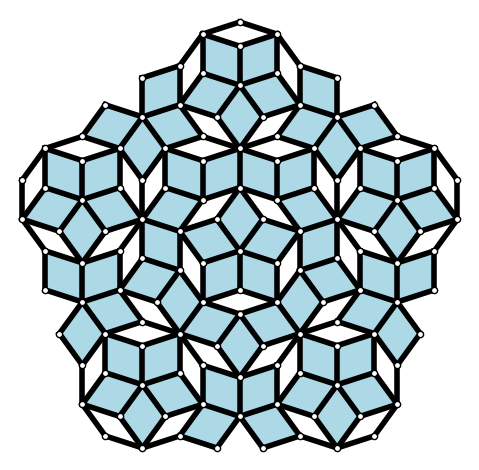

In [2]:
P = Pframework([[0,4]], placement={0: (0, 0), 4: (0,-1)})
P.add_parallelogram(0,4,1,198, new_vertices=[2,3])
P.add_parallelogram(0,4,1,-18, new_vertices=[6,5])
P.add_parallelogram(0,6,1,-18+72, new_vertices=[8,7])
P.add_parallelogram(0,8,1,-18+2*72, new_vertices=[10,9])
P.close_parallelogram(2,0,10,new_vertex=1)
for i in range(1,10,2):
    P.close_parallelogram(i,i+1,(i+2) % 10)
for i,j,k in zip(range(1,10,2),
                 [15,11,12,13,14],
                 range(0,5)):
    P.add_parallelogram(i,j,1,180+72*k-18)
for i,j,k in zip(range(11,16), range(1,10,2), range(16,25,2)):
    P.close_parallelogram(i,j,k)
for i,j,k in zip([19,21,23,25,17], range(11,16), range(26,31)):
    P.close_parallelogram(i,j,k)
for i,j,k in zip([31, 18, 32, 20, 33, 22, 34, 24, 35, 16],
                 [19, 27, 21, 28, 23, 29, 25, 30, 17, 26],
                 [18, 32, 20, 33, 22, 34, 24, 35, 16, 31]):
    P.close_parallelogram(i,j,k)
for i,j,k in zip([16, 18, 20, 22, 24],
                 [45, 37, 39, 41, 43],
                 [3*72, 4*72, 5*72, 1*72, 2*72]):
    P.add_parallelogram(i,j,1,k-18)  
for i,j,k in zip([47, 49, 51, 53, 55],
                 [45, 37, 39, 41, 43],
                 [31, 32, 33, 34, 35]):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip([36, 38, 40, 42, 44],
                 [31, 32, 33, 34, 35],
                 range(56,61)):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip([18, 20, 22, 24, 16],
                 [36, 38, 40, 42, 44],
                 range(61,66)):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip(range(66,71),
                 [18, 20, 22, 24, 16],
                 [48, 50, 52, 54, 46]):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip(range(61,66),range(66,71),range(71,76)):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip([49, 51, 53, 55, 47],
                 [48, 50, 52, 54, 46],
                 range(71,76)):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip(range(71, 76), range(81, 86), range(1,6)):
    P.add_parallelogram(i,j,1,180+72*k-18)  
for i,j,k in zip(range(87, 97,2),
                 range(81, 86),
                 [49, 51, 53, 55, 47]):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip(range(96, 101),
                 [49, 51, 53, 55, 47],
                 [57, 58, 59, 60, 56]):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip(range(86,101,2),
                 range(71, 76),
                 range(76,81)):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip(range(61,66),
                 range(76,81),
                 range(106, 111)):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip(range(56,61),
                 range(61,66),
                 range(111,116)):
    P.close_parallelogram(i,j,k) 
for i,j,k in zip(range(87,96,2),
                 range(86,95,2),
                 range(106,111)):
    P.close_parallelogram(i,j,k) 
    
filling = point2d([])
for a,b,c,d in P.four_cycles():
    if abs(RR((vector(P._pos[a])-vector(P._pos[b]))*(vector(P._pos[c])-vector(P._pos[b])))) < 0.4:
        filling += polygon([P._pos[v] for v in [a,b,c,d]], color='lightblue', axes=False)

P.plot(vertex_labels=False,vertex_size=20) + filling

We compute the 5-fold symmetry of the graph.

In [3]:
sym = CnSymmetricFlexRiGraphCartesianNACs.Cn_symmetries_gens(P,5)

We construct the same graph as an instance of $\mathcal{C}_5$-symmetric graph where only cartesian NAC-colorings are computed.

In [4]:
PenroseGraph = CnSymmetricFlexRiGraphCartesianNACs(P, sym)

The $\mathcal{C}_5$-symmetric cartesian NAC-colorings are the following.

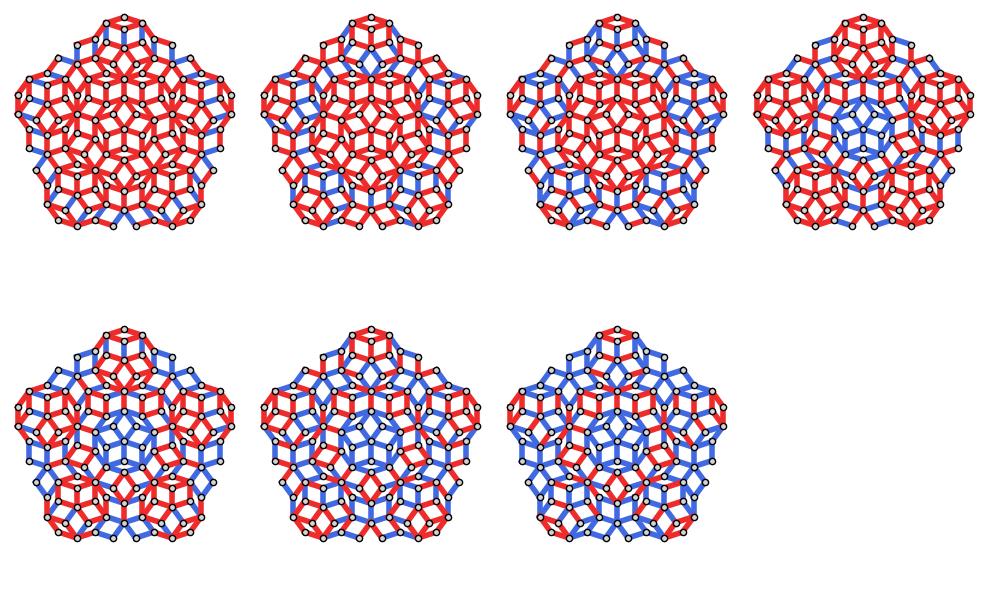

In [5]:
show(graphics_array([nac.plot(vertex_labels=False,vertex_size=20)
                     for nac in PenroseGraph.NAC_colorings()[0:]],2),figsize=10)

We pick one of them.

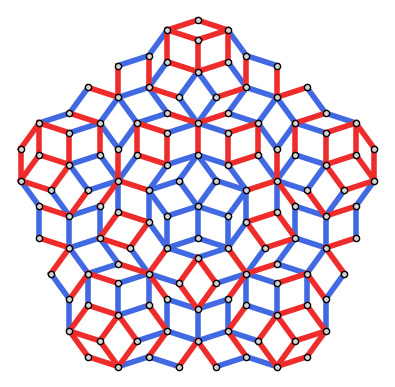

In [6]:
NAC = PenroseGraph.NAC_colorings()[-2]
NAC.plot(vertex_labels=False,vertex_size=20)

We consider the graph with its layout as a P-framework.

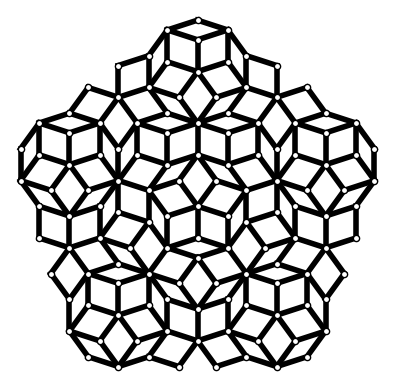

In [7]:
PenroseFramework = Pframework(PenroseGraph, PenroseGraph._pos)
PenroseFramework.plot(vertex_labels=False, vertex_size=20)

We construct a flex using the construction for P-frameworks.
Up to translation, it is automatically $\mathcal{C}_5$-symmetric
since the NAC-coloring and realization are $\mathcal{C}_5$-symmetric.

In [8]:
M = PenroseFramework.flex_from_cartesian_NAC(NAC)

In [9]:
M.translate_vertex_to_origin(0)

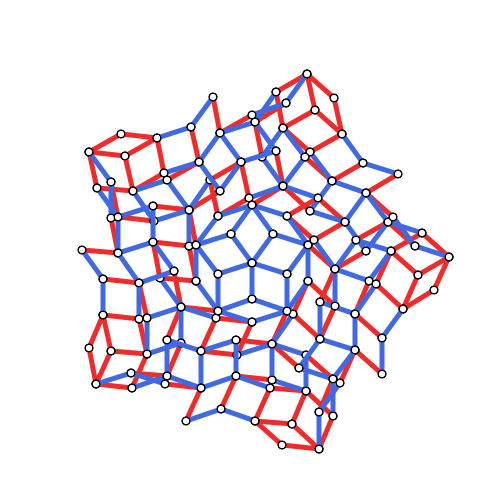

In [10]:
M.animation_SVG(edge_partition='NAC',vertex_labels=False, fileName='flexible_penrose')

We can display a few steps from the animation with filled *thin* and *fat* rhombi that preserve their shapes along the flex.

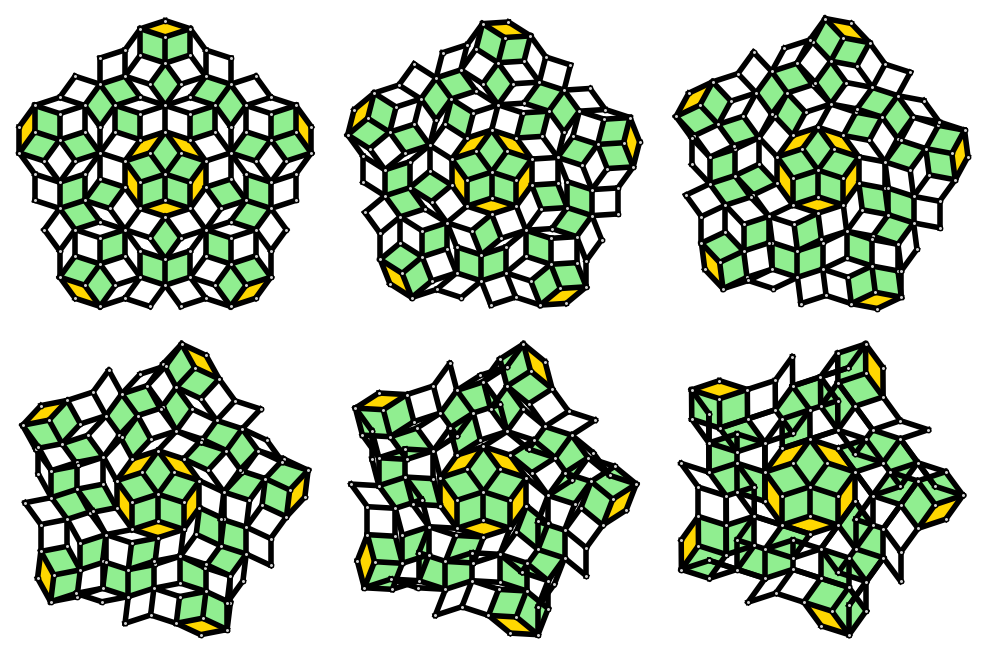

In [11]:
steps = []
thin  = []
fat = []
deformed = []
for a,b,c,d in P.four_cycles():
    if NAC.color(a,b) != NAC.color(c,b):
        deformed.append([a,b,c,d])
    else:
        if abs(RR((vector(P._pos[a])-vector(P._pos[b]))*(vector(P._pos[c])-vector(P._pos[b])))) > 0.4:
            thin.append([a,b,c,d])
        else:
            fat.append([a,b,c,d])
lowPrecField = RealField(20)
for i in range(6):
    t = 0.25*i
    PenroseGraph.set_pos(M.realization(t))
    steps.append(PenroseGraph.plot(vertex_labels=False,vertex_size=10)
                 +sum([polygon([PenroseGraph._pos[v] for v in c], color='gold', axes=False)
                           for c in thin])
                 +sum([polygon([PenroseGraph._pos[v] for v in c], color='lightgreen', axes=False)
                           for c in fat]))
show(graphics_array(steps,2),figsize=10)